# K-means clustering

*Source: Project assignment form **Andrew Ng** Machine Learning [course](https://www.coursera.org/learn/machine-learning)*.

## Finding *structure* in unlabeled data

Clustering is a type of unsupervised learning algorithm. K-means clustering is one of the most popular clustering algorithm. The goal of this algorithm is to find groups, i.e. clusters, in the given data. In the first section of this notebook, we will implement the K-means algorithm from scratch.

K-means is a very simple algorithm which clusters the data into $K$ number of clusters. The following image from [PyPR](http://pypr.sourceforge.net/kmeans.html#k-means-example) is an example of K-means clustering. 

![title](../img/k-means01.png)

## Use cases

K-means is widely used for many applications:

- Image segmentation
- Clustering gene segmentation data
- News article clustering 
- Clustering languages
- Species clustering 
- Anomaly detection

## Algorithm

The K-means algorithm works as follows. Assuming we have $n$ inputs $x_1, x_2, x_3, \ldots, x_n$ and a value $K \in \mathbb{N}$:

- Step 1: Pick $K$ random points as cluster centers called centroids.
- Step 2: Assign each $x_i$ to the nearest cluster by calculating its distance te each centroid. 
- Step 3: Find new cluster center by taking the average of the assigned points.
- Step 4 - Repeat steps 2 and 3 until convergence (i.e. until none of the cluster assignments change).

The above animation is an example of running K-mens clustering on a two-dimensional data set.

![title](../img/k-means02.gif)

## Mathematical formulation

### Step 1

We randomly pich K cluster centers (centroids). Let's assume these are $c_1, c_2, \ldots, c_k$ and let $C = \{c_1, c_2, \ldots, c_k\}$ be the set of all centroids.

### Step 2

In this step we assign each input value to the closest center. This is done by calculating the Euclidean $(L2)$ distance between the point and each centroid. Formally we iteratively compute ${\arg \min}_{c_i \in C} dist(c_i, x)^2$, where $dist()$ is the Euclidean distance.

### Step 3

In this step, we find the new centroid by taking the average of all the points assigned to that cluster. Formally, $c_i  = \frac{1}{|S_i|}\sum_{x_i \in S_i} x_i$, where $S_i$ is the set of all points assigned to the $i^{th}$ cluster.

### Step 4

We repeat steps 2 and 3 until convergence.

## Choosing the value of $K$

Most of the time, the value of $K$ is given to us in the problem statement. If the value of $K$ is unknown, we use the *elbow method*. Specifically, we run the algorithm for different values of $K$ (typically from $K = 1$ to $10$) and plot the $K$ values against the $SSE$ (sum of squared errors). We select the value of $K$ corresponding to the *elbow point* shown in the figure below.

![text](../img/k-means03.png)

## K-means from scratch

The data set we are goind to use has $3000$ entries (observations) and $K = 3$ clusters (the value of $K$ is known). 

In [24]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [25]:
# importing the data set
data = pd.read_csv('../data/xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [26]:
# DataFrame.values
# Return a Numpy representation of the DataFrame.
# Only the values in the DataFrame will be returned, 
# the axes labels will be removed.

f1  = data['V1'].values # or equivalently f1 = data.V1.values
print(f1)
print(type(f1))

print('\n')

f2 = data['V2'].values # or equivalently f2 = data.V2.values
print(f2)
print(type(f2))

[ 2.072345 17.93671   1.083576 ... 64.46532  90.72282  64.87976 ]
<class 'numpy.ndarray'>


[ -3.241693  15.78481    7.319176 ... -10.50136  -12.25584  -24.87731 ]
<class 'numpy.ndarray'>


In [27]:
X = np.array(list(zip(f1, f2)))
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

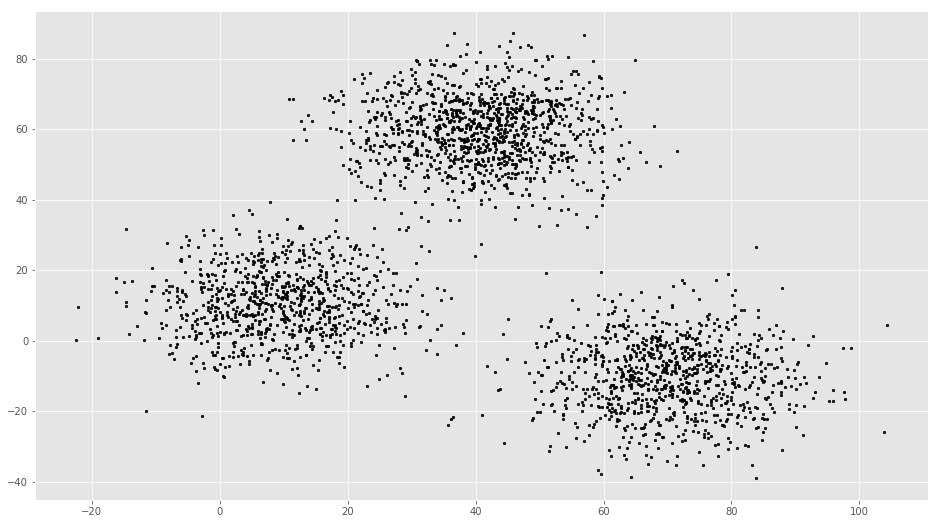

In [28]:
plt.scatter(f1, f2, c = 'black', s = 7)
# or equivalently plt.scatter(data.V1, data.V2, c = 'black', s = 7)

In [29]:
# Euclidean distance calculator
def dist(a, b, ax = 1):
    return np.linalg.norm(a - b, axis = ax)

In [32]:
# number of clusters
k = 3

# x coordinates of initial random centroids
C_x = np.random.randint(0, np.max(X)-20, size = k)
print(C_x)

# y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size = k)
print(C_y)

C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
print(C)

[4 0 5]
[60 41 53]
[[ 4. 60.]
 [ 0. 41.]
 [ 5. 53.]]


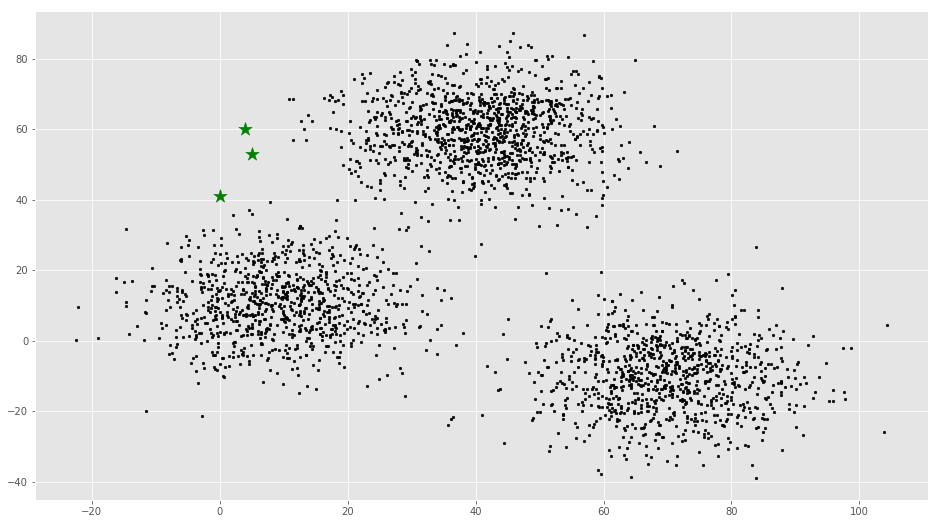

In [36]:
# adding the centroids to the plot
plt.scatter(f1, f2, c = 'black', s = 7)
plt.scatter(C_x, C_y, marker = '*', s = 200, c = 'g')